In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *

In [4]:
import csv
#import numpy
from os import listdir
from os.path import isfile, join

### Load dataset

In [3]:
users = pd.read_csv('datasets/User.csv')
symptom = pd.read_csv('datasets/Symptom.csv')
period = pd.read_csv('datasets/Period.csv')

In [4]:
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 4 columns):
id                       6729 non-null int64
dob                      440 non-null object
cycle_length_initial     6729 non-null int64
period_length_initial    6729 non-null int64
dtypes: int64(3), object(1)
memory usage: 210.4+ KB


In [5]:
users.isnull().sum()

id                          0
dob                      6289
cycle_length_initial        0
period_length_initial       0
dtype: int64

## 2 . Preprocessing Data

## We found many NaN values in dob columns. It can be explained that users avoid to inputting their personal inforlmation. So dropping this column is better for the exploratory data

In [6]:
df_user = users.drop(columns = ['dob'])

In [7]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
id                       6729 non-null int64
cycle_length_initial     6729 non-null int64
period_length_initial    6729 non-null int64
dtypes: int64(3)
memory usage: 157.8 KB


In [8]:
df_user.describe()

,id,cycle_length_initial,period_length_initial
count,6729.000000,6729.000000,6729.000000
mean,3689.714816,28.710358,5.485362
std,1944.844016,2.728839,2.611793
min,252.000000,25.000000,2.000000
25%,2009.000000,28.000000,4.000000
50%,3691.000000,28.000000,5.000000
75%,5373.000000,29.000000,6.000000
max,7055.000000,40.000000,51.000000


### we can see some nonsense Max value in period_length_initial column. It is not normal if the period last more than 7 days

In [9]:
# we split users into 3 groups:
# group 1: length <= 7
# group 2: 7 < length <= 15
# group 3: 15 < length <= 51

criteria  = df_user['period_length_initial'] <= 7
df_user1 = df_user[criteria]

criteria1  = df_user['period_length_initial'] > 7 
criteria2 = df_user['period_length_initial'] <= 15
criteria = criteria1 & criteria2

df_user2 = df_user[criteria]

criteria = df_user['period_length_initial'] > 15
df_user3 = df_user[criteria]


In [10]:
# show some lines of each dataframe
print(df_user1.head())
print(df_user2.head())
print(df_user3.head())

    id  cycle_length_initial  period_length_initial
0  252                    28                      6
1  253                    30                      5
2  254                    28                      6
3  255                    30                      4
4  256                    25                      6
     id  cycle_length_initial  period_length_initial
14  266                    34                      8
16  269                    28                      8
25  278                    28                      8
37  290                    28                      8
39  292                    25                      8
       id  cycle_length_initial  period_length_initial
275   602                    28                     16
329   656                    25                     51
590   917                    32                     33
733  1060                    28                     16
903  1230                    30                     35


### Lets explore period dataset

In [11]:
period.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34942 entries, 0 to 34941
Data columns (total 4 columns):
id            34942 non-null int64
start_date    34939 non-null object
end_date      32168 non-null object
User_id       34942 non-null int64
dtypes: int64(2), object(2)
memory usage: 1.1+ MB


In [14]:
#df_period = period.dropna()
#df_period.info()

#convert date object into date format
df_period = period
df_period['start_date'] = pd.to_datetime(df_period['start_date'], errors='coerce' )
df_period['end_date'] = pd.to_datetime(df_period['end_date'], errors='coerce' )
df_period = df_period.dropna()


#period['start'] = pd.to_datetime(period['start_date'])
#period['end'] = pd.to_datetime(period['end_date'])

### Lets see how many missing records deleted

In [15]:
print(len(period.values) - len(df_period.values))

2779


### Lets explore symptom dataset

In [16]:
symptom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 13 columns):
id          13512 non-null int64
user_id     13512 non-null int64
acne        13512 non-null int64
backache    13512 non-null int64
bloating    13512 non-null int64
cramp       13512 non-null int64
diarrhea    13512 non-null int64
dizzy       13512 non-null int64
headache    13512 non-null int64
mood        13512 non-null int64
nausea      13512 non-null int64
sore        13512 non-null int64
date        13512 non-null object
dtypes: int64(12), object(1)
memory usage: 1.3+ MB


In [17]:
symptom.isnull().sum()

id          0
user_id     0
acne        0
backache    0
bloating    0
cramp       0
diarrhea    0
dizzy       0
headache    0
mood        0
nausea      0
sore        0
date        0
dtype: int64

### There is no NaN values found in Symptom dataset. 
### Convert date object into date format

In [18]:
df_symptom = symptom
df_symptom['date'] = pd.to_datetime(df_symptom['date'], errors='coerce')

In [19]:
df_symptom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13512 entries, 0 to 13511
Data columns (total 13 columns):
id          13512 non-null int64
user_id     13512 non-null int64
acne        13512 non-null int64
backache    13512 non-null int64
bloating    13512 non-null int64
cramp       13512 non-null int64
diarrhea    13512 non-null int64
dizzy       13512 non-null int64
headache    13512 non-null int64
mood        13512 non-null int64
nausea      13512 non-null int64
sore        13512 non-null int64
date        13511 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(12)
memory usage: 1.3 MB


In [20]:
df_symptom.describe()

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore
count,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000,13512.000000
mean,6951.902679,3559.687537,11.383141,18.282490,18.885287,27.093176,6.690571,6.338958,14.825636,20.376406,6.813721,14.736530
std,3921.610731,1891.767966,21.793378,29.024682,29.092707,33.815321,18.430359,17.789091,26.607968,31.515778,18.911498,27.332721
min,127.000000,252.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3553.750000,2000.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6958.500000,3475.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10348.250000,5147.250000,16.000000,32.000000,34.000000,51.000000,0.000000,0.000000,22.000000,36.000000,0.000000,20.000000
max,13732.000000,7054.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


### To easy to know how much painful users suffer before, after and during period, We add one more column that is total of value of symptoms

In [21]:
df_sum = df_symptom.drop(columns = ['id', 'user_id', 'date'])
df_symptom['total'] = np.sum(df_sum, axis=1)

df_symptom.head()

,id,user_id,acne,backache,bloating,cramp,diarrhea,dizzy,headache,mood,nausea,sore,date,total
0,127,252,0,0,0,0,0,0,0,0,0,0,2015-11-04,0
1,128,257,0,0,0,46,0,0,0,0,0,0,2015-10-04,46
2,129,257,0,0,0,0,0,27,48,0,0,0,2015-11-04,75
3,130,263,0,0,0,0,0,0,0,0,0,0,2015-11-04,0
4,132,269,0,0,0,0,0,0,0,0,0,0,2015-11-04,0


## 3. Exploratory Data Analysis

In [22]:
import matplotlib.pyplot as  plt

In [23]:
print(df_user1.head())
print(df_symptom.head())

    id  cycle_length_initial  period_length_initial
0  252                    28                      6
1  253                    30                      5
2  254                    28                      6
3  255                    30                      4
4  256                    25                      6
    id  user_id  acne  backache  bloating  cramp  diarrhea  dizzy  headache  \
0  127      252     0         0         0      0         0      0         0   
1  128      257     0         0         0     46         0      0         0   
2  129      257     0         0         0      0         0     27        48   
3  130      263     0         0         0      0         0      0         0   
4  132      269     0         0         0      0         0      0         0   

   mood  nausea  sore       date  total  
0     0       0     0 2015-11-04      0  
1     0       0     0 2015-10-04     46  
2     0       0     0 2015-11-04     75  
3     0       0     0 2015-11-04      0  
4  

### We know that period length is not valid if it is greater than 7. Let plot 3 group of periods to see how many invalid data

<BarContainer object of 3 artists>

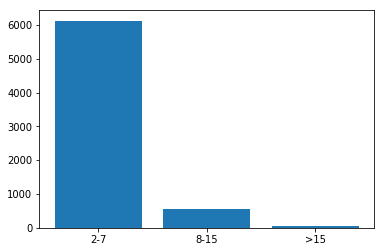

In [35]:
data = {'2-7':len(df_user1), '8-15':len(df_user2), '>15':len(df_user3)}
cols = list(data.keys())
vals = list(data.values())    

plt.bar(cols, vals)


### Next, we will discover if there is any relation between period length and symptom

<BarContainer object of 3 artists>

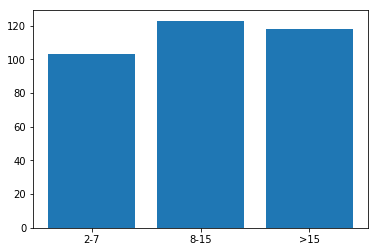

In [36]:
df_tmp = df_user1.set_index('id').join(df_symptom.set_index('user_id'))
val1 = df_tmp['total'].median()

df_tmp = df_user2.set_index('id').join(df_symptom.set_index('user_id'))
val2 = df_tmp['total'].median()

df_tmp = df_user3.set_index('id').join(df_symptom.set_index('user_id'))
val3 = df_tmp['total'].median()

data = {'2-7':val1, '8-15':val2, '>15':val3}
cols = list(data.keys())
vals = list(data.values())

plt.bar(cols, vals)


### Users with normal period (7 days maximum) tend to suffer less pain than users with long period

<BarContainer object of 2 artists>

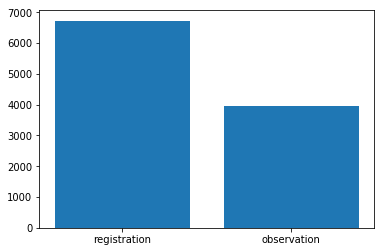

In [73]:
df_tmp = df_symptom.set_index('user_id').join(df_user.set_index('id'), how='outer')

data = {'registration':len(df_user['id']), 'observation':len(df_symptom.groupby('user_id'))}
keys = list(data.keys())
vals = list(data.values())

plt.bar(keys, vals)



### The number of people who record their data are just a little bit more than half of registration. Maybe, they forget to track their activity after creating an account on application. There should be an automatic notification to remind users keeping to record their data

In [13]:
    #def __init__(self):
    #    self.list_tuple=1
        
    def readCSV(file_name):
        csv_file = open(file_name, mode='rU')
        data = csv.DictReader(csv_file)
        return data
    def date2days(date):
        if len(date) and '/' in date:
            date=date.strip('')
            date=date.split("/")
            #print int(date[0]) + int(date[1])*30 + int(date[2])*365
            return int(date[0]) + int(date[1])*30 + int(date[2])*365
        else:
            return len(date)
        
    def totalcoloumn(matrix):
        temp=[]
        for row in matrix:
            sum=0
            for i in range(len(row)):
                sum+=int(row[i])
            temp.append(sum)
        return temp
    
    def coloumn(matrix, i):
        temp=[]
        for row in matrix:
            if i<len(row):
                temp.append(row[i])
        return temp

In [35]:
    def parseVal():
        #onlyfiles = [f for f in listdir("/Users/abhishekmishra/Downloads/Hackathon/ECG_RR/bidmc_csv") if isfile(join("/Users/abhishekmishra/Downloads/Hackathon/ECG_RR/bidmc_csv", f))]
        #mypath = "/Users/abhishekmishra/Downloads/Hackathon/pslovedata/"$
        mypath = "datasets/"
        #period = pslove()
        #user = pslove()
        #symptom = pslove()
        period_data = readCSV(mypath+"Period.csv")
        user_data = readCSV(mypath+"User.csv")
        symptom_data = readCSV(mypath+"Symptom.csv")
        user_id_array=set()
        user_dict={}
        for row in user_data:
            user_id_array.add(row["id"])
        for i in range(len(list(user_id_array))):
            user_dict[list(user_id_array)[i]]=[]
        user_data = readCSV(mypath+"User.csv")
        for row in user_data:
            user_dict[row["id"]].append(row)
        period_data = readCSV(mypath+"Period.csv")
        for row in period_data:
            user_dict[row["User_id"]].append(row)
        symptom_data = readCSV(mypath+"Symptom.csv")
        for row in symptom_data:
            user_dict[row["user_id"]].append(row)
        analyze_list=[]
        for key in user_dict.keys():
            flag=1
            index=1
            final_index=1
            if len(user_dict[key])>1:
                while(flag):
                    if "User_id" in user_dict[key][index].keys():
                        index+=1
                    else:
                        flag=0
                        final_index=index
                        index=final_index
                    if index==len(user_dict[key]):
                        break
                while(index<len(user_dict[key])):
                    temp=[]
                    temp.append(user_dict[key][0]['cycle_length_initial'])
                    temp.append(user_dict[key][0]['period_length_initial'])
                    val=date2days(user_dict[key][index]["date"])
                    flag=0
                    for i in range(1,final_index):
                        #print self.date2days(user_dict[key][i]["end_date"]) - self.date2days(user_dict[key][i]["start_date"])
                        if (val>=date2days(user_dict[key][i]["start_date"]) and val<=date2days(user_dict[key][i]["end_date"])):
                            if (val-date2days(user_dict[key][i]["start_date"]))>0 and (val-date2days(user_dict[key][i]["start_date"]))<15:
                                temp.append(val-date2days(user_dict[key][i]["start_date"]))
                                #print val-self.date2days(user_dict[key][i]["start_date"])
                            else:
                                temp.append(0)
                            flag=1
                            break
                    if flag==0:
                        temp.append(flag)
                    index+=1
                    if 'backache' in user_dict[key][index-1].keys():
                        temp.append(user_dict[key][index-1]['backache'])
                        temp.append(user_dict[key][index-1]['cramp'])
                        temp.append(user_dict[key][index-1]['mood'])
                        temp.append(user_dict[key][index-1]['bloating'])
                        temp.append(user_dict[key][index-1]['acne'])
                        temp.append(user_dict[key][index-1]['diarrhea'])
                        temp.append(user_dict[key][index-1]['sore'])
                        temp.append(user_dict[key][index-1]['dizzy'])
                        temp.append(user_dict[key][index-1]['nausea'])
                        temp.append(user_dict[key][index-1]['headache'])
                    analyze_list.append(temp)
            else:
                temp=[]
                temp.append(user_dict[key][0]['cycle_length_initial'])
                temp.append(user_dict[key][0]['period_length_initial'])
                analyze_list.append(temp)
        pain_dict={}
        pain_dict["1"]='backache'
        pain_dict["2"]='cramp'
        pain_dict["3"]='mood'
        pain_dict["4"]='bloating'
        pain_dict["5"]='acne'
        pain_dict["6"]='diarrhea'
        pain_dict["7"]='sore'
        pain_dict["8"]='dizzy'
        pain_dict["9"]='nausea'
        pain_dict["10"]='headache'
        for i in range(10):
            string=pain_dict[str(i+1)]
            plt.figure(i+1)
            colors = (0,0,0)
            area = np.pi*3
            plt.scatter(coloumn(analyze_list,2),coloumn(analyze_list,3+i),s=area, c=colors, alpha=0.7)
            plt.xlabel("Days passed from start of period")
            plt.ylabel(string+" Score")
            plt.title(string + " variation with period onset")
            plt.yticks(np.arange(1,100,20))
            plt.savefig(string+".png")
            plt.show()
            
            #for i in range(1):
        plt.figure(11)
        colors = (0,0,0)
        area = np.pi*3
        plt.scatter(coloumn(analyze_list,1),totalcoloumn(analyze_list),s=area, c=colors, alpha=0.7)
        plt.xlabel("Initial period length")
        plt.ylabel("Frequency of user's record")
        plt.title("Pain variation with initial period length")
        plt.yticks(np.arange(1,1500,100))
        #plt.savefig("Pain Initial Period.png")
        plt.show()
    #for i in range(1):
        plt.figure(12)
        colors = (0,0,0)
        area = np.pi*3
        plt.scatter(coloumn(analyze_list,0),totalcoloumn(analyze_list),s=area, c=colors, alpha=0.7)
        plt.xlabel("Initial cycle length")
        plt.ylabel("Frequency of user's record")
        plt.title("Pain variation with initial cycle length")
        plt.yticks(np.arange(1,1500,100))
        #plt.savefig("Pain Initial cycle.png")
        plt.show()#

### We will plot the frequency distribution of symptoms according to cycle length and period length

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: 'U' mode is deprecated
  """


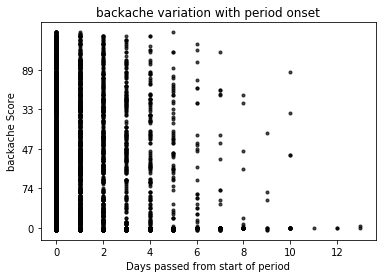

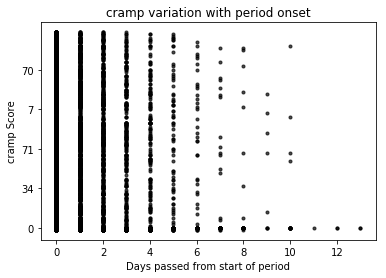

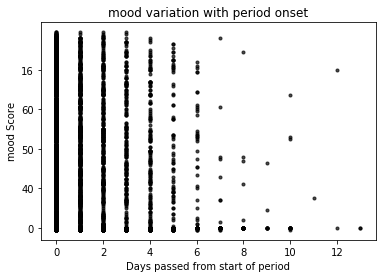

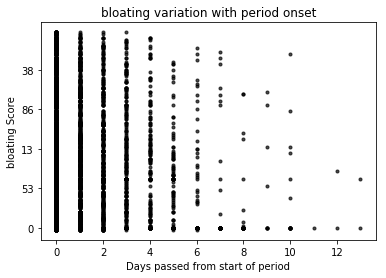

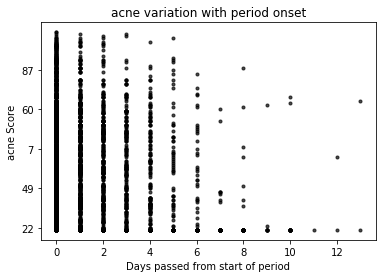

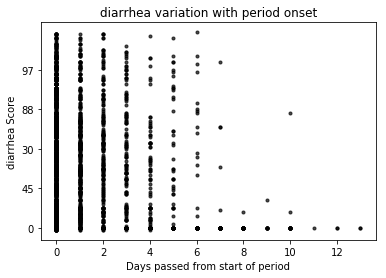

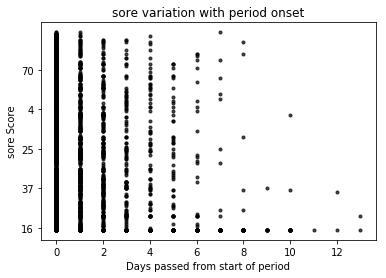

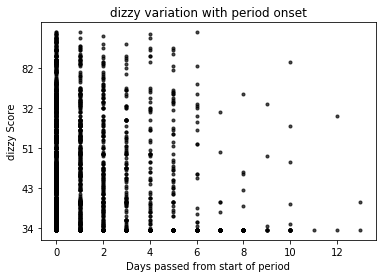

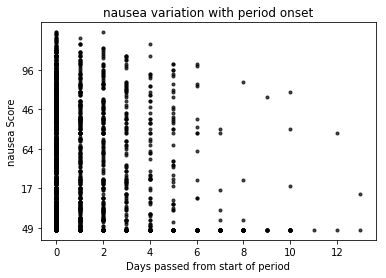

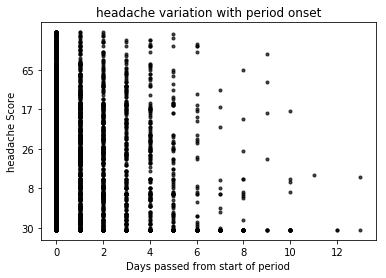

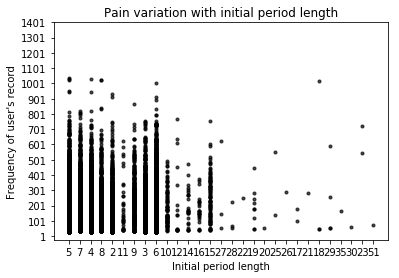

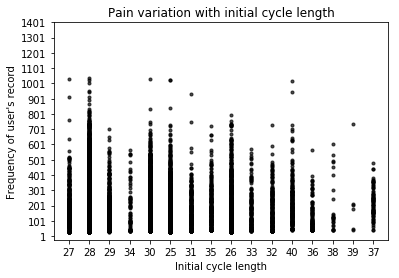

In [36]:
parseVal()

### The output clearly shows that all the pain scores follow a general trend of decreasing with increase of days passed from the onset of period. 
### After 6th day, we notice that pain is almost minimal. We can conclude that this sort of data distribution is not normal and can be considered as outliners
### Based on type of symptoms happens before and on initial days of period, we can recommend medicine , herbs and pregnant pills to users.